# Neural Networks

## Exercise 1a

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
image_data = tf.keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels),(test_images, test_labels) = image_data.load_data()

### 1. Plot 16 random samples from the training set with the corresponding labels

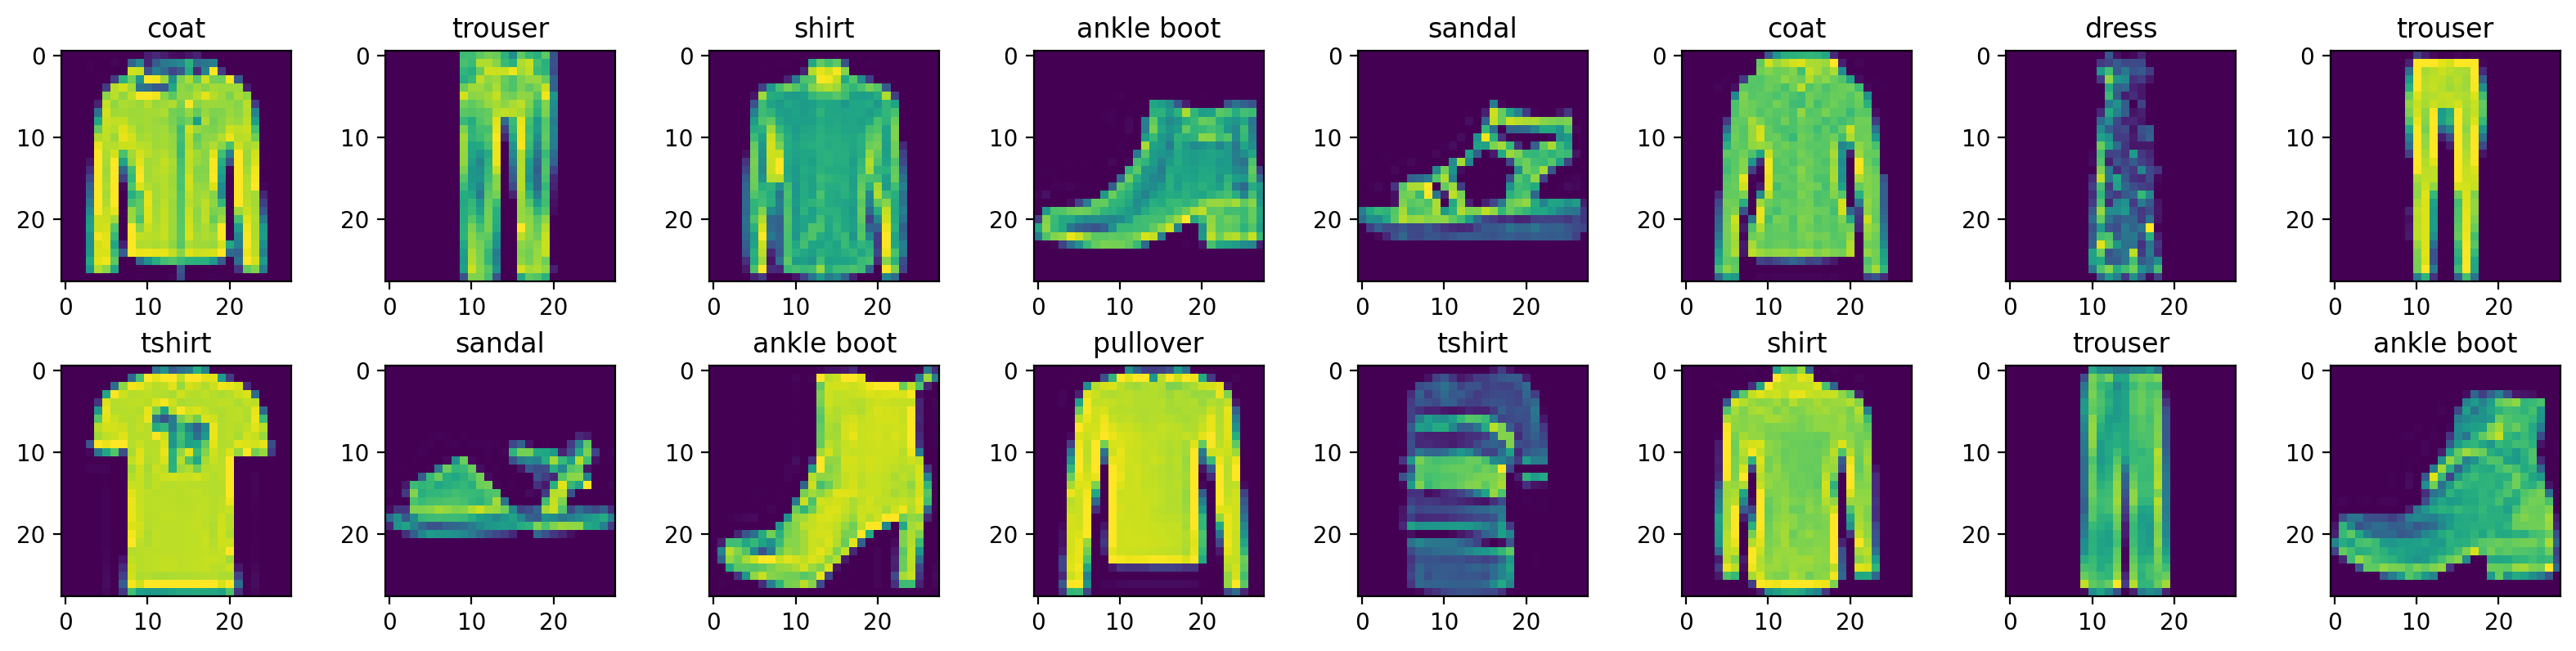

In [4]:
import random
random_numbers = [x for x in range(60000)]
random.shuffle(random_numbers)

classes = ['tshirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

#visualize with 2x5 grid
plt.rcParams['figure.figsize'] = (16,4)
plt.rcParams['figure.dpi'] = 200

for i in range(16):
    plt.subplot(2,8, i+1)
    plt.imshow(train_images[random_numbers[i]].reshape(28,28))
    plt.title(classes[train_labels[random_numbers[i]]])
plt.tight_layout()

Types of parameters to tweak: 
- Learning rate : Can be changed in the compilation of the compiler by the command tf.keras.optimizers.Adam(learning_rate=0.001)
- Number of hidden layers : Consists in the number neurons inside a perceptron layer. More layers does not automatically means better results and it can get slower as well.
- Size of hidden layers: The number inside of the Dense layers. It is still possible to change the types of layers inside the neural network.
- Activation function: Allows it to learn complex pattern in the data. Here, the one used is "relu" but sigmoid or tanh can as well be used.
- Regularization: Prevent overfitting. Common type of regularization is l1 and L2 regularization using tf.keras.regularizers.l2

In [5]:
# Need to normalize the data first
train_images = train_images / 255.0
test_images = test_images / 255.0

We train a first model with 3 layers:
 1: Flatten the image
 2: Hidden layer of 128 neurons
 3: Output layer of size 10 corresponding to the 10 different outputs

In [6]:
model = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(128, activation="relu"),
                                tf.keras.layers.Dense(10)
    ])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"]
             )

model.fit(train_images,train_labels,epochs=10)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print("Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

C:\Users\user\Python\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7839 - loss: 0.6230
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8608 - loss: 0.3846
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8744 - loss: 0.3422
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8884 - loss: 0.3101
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8925 - loss: 0.2906
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8973 - loss: 0.2761
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9004 - loss: 0.2653
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9078 - loss: 0.2500
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9077 - loss: 0.2512
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9095 - loss: 0.2406
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8761 - loss: 0.3563
Loss: 0.3594139814376831
Test Accuracy: 0.87

The function "build_model" will help us tweak some of the parameters and decide how many layers we want for the model

In [7]:
def build_model(activation='relu', dropout_rate=0.2, learning_rate=0.001, num_unit=128, num_layer=1):
    tf.keras.backend.clear_session()
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
    for i in range(num_layer):
        model.add(tf.keras.layers.Dense(num_unit, activation=activation))
        model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(10))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
             loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"]
             )
    return model

#### Why did I use ParamterGrid rather than SearchGridCV ? 

While starting to learn about neurons network, I tried to use GridSearchCV with TenserFlow and it didn't work because somehow it was not possible to use the model inside GridSearchCV. However, here, what is most important is to test the hyperparameters and not to apply a cross validation. In that sense, ParameterGrid is as well suitable according to the instructions as the main difference with GridSearchCv is that it does not perform any cross valdiation. 

On this link there is: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html
Where it is stated that "GridSearchCV Uses ParameterGrid to perform a full parallelized parameter search."

In [9]:
from sklearn.model_selection import ParameterGrid

param_grid = {
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'activation': ['relu', 'sigmoid'],
    'dropout_rate': [0.2, 0.3],
    'num_unit': [128, 256],
    'num_layer': [1, 2]
}

grid = ParameterGrid(param_grid)
best_accuracy = 0
best_params = None
cross_vad_div = 5

# Iterate over each combination of hyperparameters
for params in grid:
    print("Training with hyperparameters:", params)
    model = build_model(**params)
    history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels), verbose=0)
    accuracy = history.history['val_accuracy'][-1]  # Take the last epoch's validation accuracy
    print("Validation Accuracy:", accuracy)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best validation accuracy:", best_accuracy)
print("Best hyperparameters:", best_params)

Training with hyperparameters: {'activation': 'relu', 'dropout_rate': 0.2, 'learning_rate': 0.001, 'num_layer': 1, 'num_unit': 64}



C:\Users\user\Python\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.8574000000953674
Training with hyperparameters: {'activation': 'relu', 'dropout_rate': 0.2, 'learning_rate': 0.001, 'num_layer': 1, 'num_unit': 128}
Validation Accuracy: 0.8730999827384949
Training with hyperparameters: {'activation': 'relu', 'dropout_rate': 0.2, 'learning_rate': 0.001, 'num_layer': 2, 'num_unit': 64}


KeyboardInterrupt: 

The best parameters are: {'activation': 'relu', 'dropout_rate': 0.2, 'learning_rate': 0.001, 'num_layer': 1, 'num_unit': 256}

In [10]:
confusion_matrix = [[0 for _ in range(10)] for _ in range(10)]

best_model = build_model(best_params)
best_model.fit(train_images,train_labels,epochs=10)
y_pred = best_model.predict(test_images)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7722 - loss: 0.6459
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8567 - loss: 0.3959
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8685 - loss: 0.3525
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8769 - loss: 0.3338
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8816 - loss: 0.3169
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8883 - loss: 0.3007
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8904 - loss: 0.2934
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8957 - loss: 0.2844
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8993 - loss: 0.2728
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9004 - loss: 0.2624
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step


In [11]:
print(test_images.shape)
print(test_labels.shape)
final_loss, final_accuracy = best_model.evaluate(test_images, test_labels)
print("Best validation accuracy:", final_accuracy)

(10000, 28, 28)
(10000,)
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8808 - loss: 0.3354
Best validation accuracy: 0.8823000192642212


## Exercise 1b
### The confusion matrix

In [42]:
for i in range(y_pred.shape[0]):
    confusion_matrix[np.argmax(y_pred[i])][test_labels[i]] += 1

In [43]:
for i in range(10):
    for j in range(10):
        print("{:4}".format(confusion_matrix[i][j]), end="|")
    print()

 854|   5|  14|  21|   0|   0| 144|   0|   3|   0|
   1| 969|   0|   2|   0|   0|   0|   0|   0|   0|
  14|   0| 791|  11|  82|   0| 103|   0|   4|   0|
  30|  20|  16| 930|  49|   0|  40|   0|   5|   1|
   4|   3| 130|  18| 839|   0| 108|   0|   2|   0|
   1|   0|   1|   0|   0| 974|   0|  14|   3|  23|
  90|   2|  46|  15|  30|   0| 599|   0|   3|   1|
   0|   0|   0|   0|   0|  22|   0| 979|   4|  59|
   6|   1|   2|   3|   0|   0|   6|   0| 976|   0|
   0|   0|   0|   0|   0|   4|   0|   7|   0| 916|


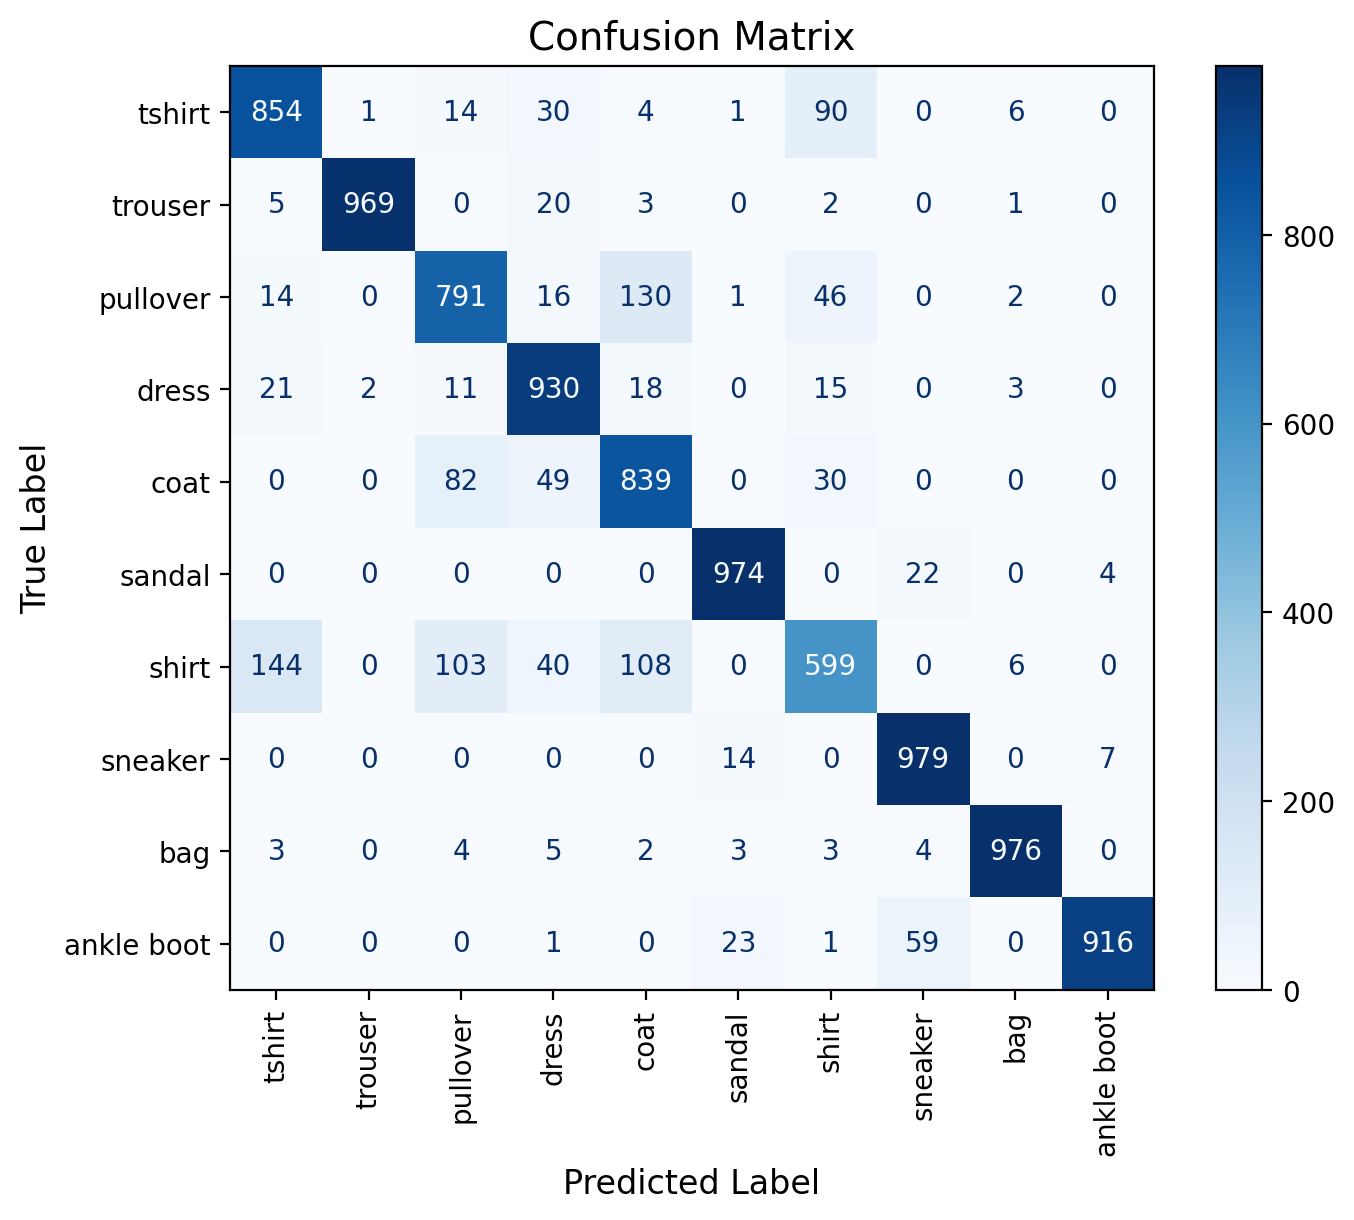

In [48]:
from sklearn import metrics
y_predicted = [np.argmax(y_pred[x]) for x in range(y_pred.shape[0])]
confusion_matrix = metrics.confusion_matrix(test_labels, y_predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['tshirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot'])

# Plot the confusion matrix with customizations
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figure size as needed

# Plot the confusion matrix with custom display labels and fontsize
cm_display.plot(ax=ax, xticks_rotation='vertical', cmap='Blues', values_format='d')  # Customize the plot as needed
plt.xticks(fontsize=10)  # Adjust the x-axis label size
plt.yticks(fontsize=10)  # Adjust the y-axis label size
plt.xlabel('Predicted Label', fontsize=12)  # Adjust the x-axis label size
plt.ylabel('True Label', fontsize=12)  # Adjust the y-axis label size
plt.title('Confusion Matrix', fontsize=14)  # Adjust the title size

plt.show()

According to the confusion matrix, we can see that picture containing shirt, tshirt, coat and pullover are rather hard categories to classify.

Easy categories to classify are sneakers, bag, sandal and trouser.

Classes that get mixed together are: pullover and coats, tshirt and shirt, pullover and shirt if we only take the missclassification higher than 100.

In [132]:
list_of_misclassification = []
for i in range(y_pred.shape[0]):
    if np.argmax(y_pred[i]) == 2 and test_labels[i] == 4:
        list_of_misclassification.append(i)
    elif np.argmax(y_pred[i]) == 4 and test_labels[i] == 2:
        list_of_misclassification.append(i)
    elif np.argmax(y_pred[i]) == 0 and test_labels[i] == 6:
        list_of_misclassification.append(i)
    elif np.argmax(y_pred[i]) == 6 and test_labels[i] == 0:
        list_of_misclassification.append(i)
    elif np.argmax(y_pred[i]) == 2 and test_labels[i] == 6:
        list_of_misclassification.append(i)
    elif np.argmax(y_pred[i]) == 6 and test_labels[i] == 2:
        list_of_misclassification.append(i)

In [133]:
import random
random.shuffle(list_of_misclassification)

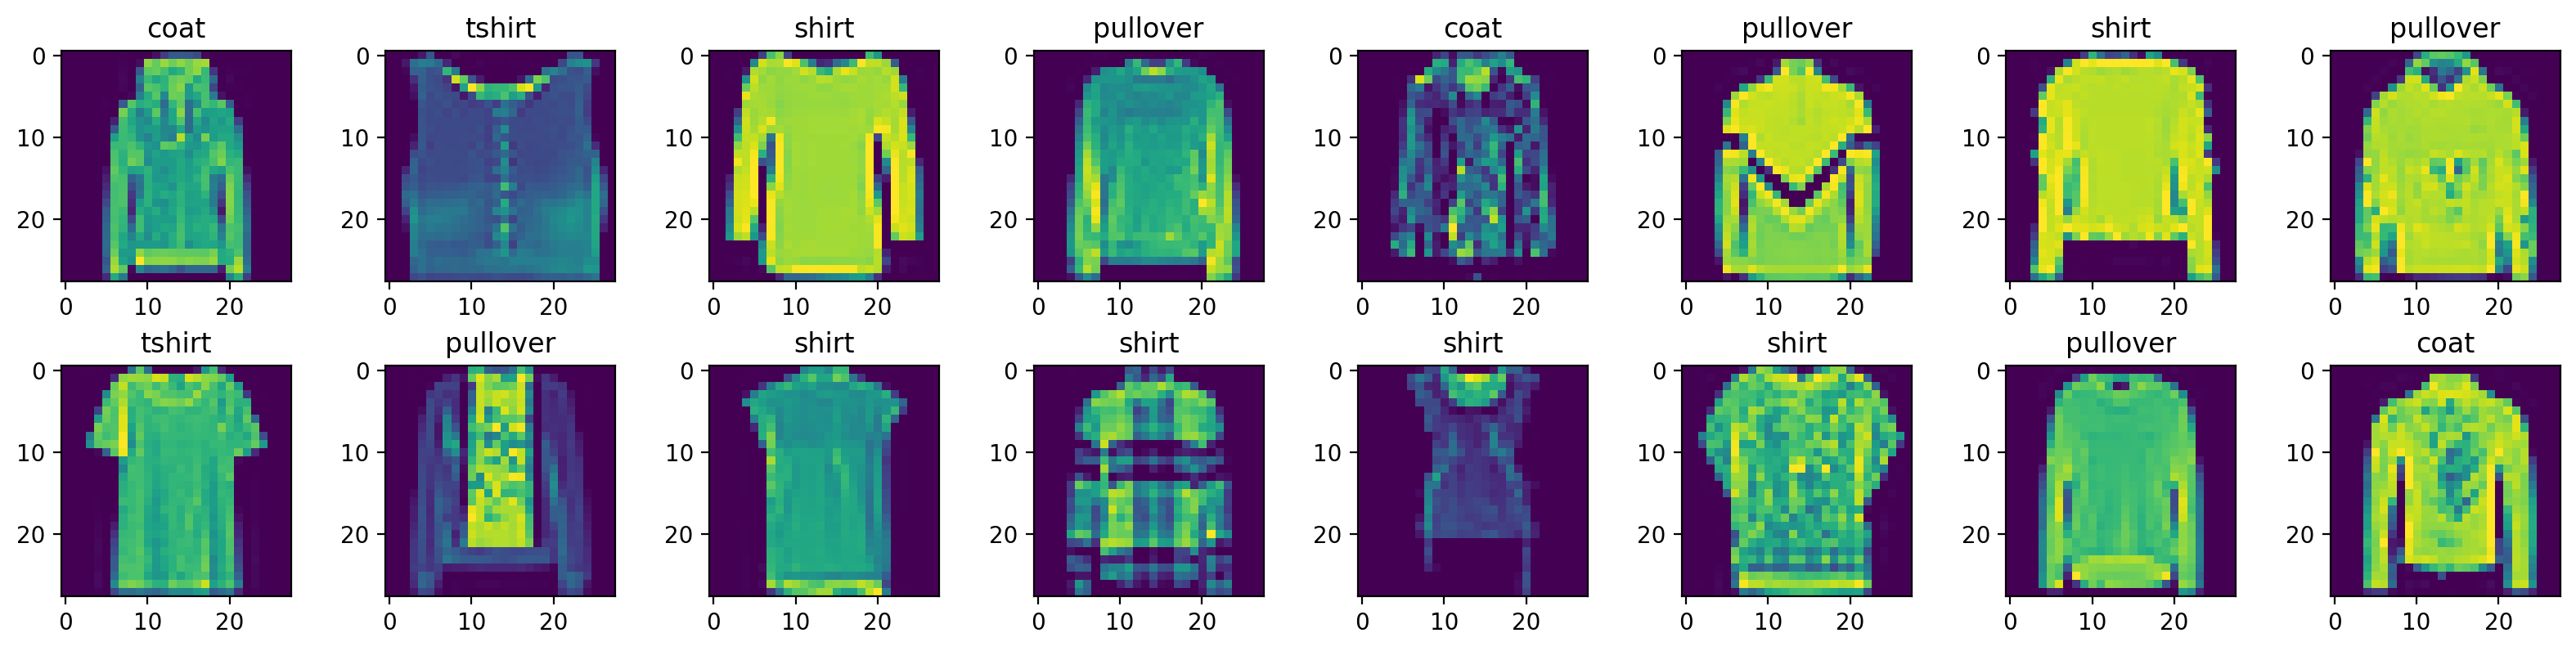

In [134]:
classes = ['tshirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

#visualize with 2x5 grid
plt.rcParams['figure.figsize'] = (16,4)
plt.rcParams['figure.dpi'] = 200

for i in range(16):
    plt.subplot(2,8, i+1)
    plt.imshow(test_images[list_of_misclassification[i]].reshape(28,28))
    plt.title(classes[test_labels[list_of_misclassification[i]]])
plt.tight_layout()

I think that it is fair that the system makes misclassifications as there are different criteria to take into configuration: 

Even as a human, it can be complex to classify some of the clothes as shirt, dress or tshirt. Some are, of course, more obvious due to patterns that I can recognize as a human (such as the hood) otherwise it is not obvious.

The second element that explains the misclassifications are as well the definition. 28 * 28 is good for an exercise but not for catching the details of proper clothes. Hence, this explains why it is hard to differentiate between shirt, tshirt and pullover as real life clothes have more nuances that what could be displayed in the 28 * 28 grid.